In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


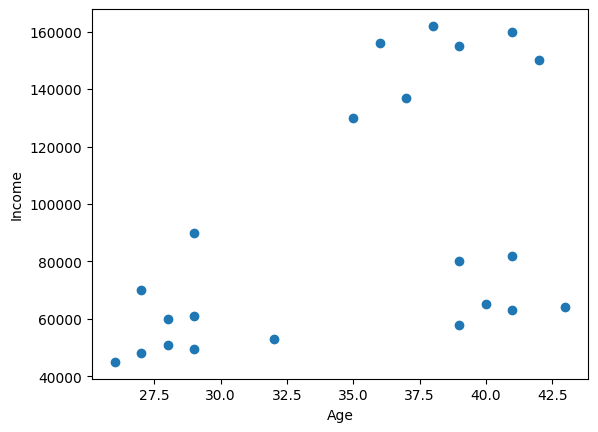

In [4]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [7]:
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])

In [8]:
df.head()

,Name,Age,Income($)
0,Rob,-1.356055,70000
1,Michael,-1.009157,90000
2,Mohan,-1.009157,61000
3,Ismail,-1.182606,60000
4,Kory,1.245679,150000


In [9]:
df['Income($)'] = scaler.fit_transform(df[['Income($)']])

In [10]:
df.head()

,Name,Age,Income($)
0,Rob,-1.356055,-0.480684
1,Michael,-1.009157,-0.010159
2,Mohan,-1.009157,-0.692421
3,Ismail,-1.182606,-0.715947
4,Kory,1.245679,1.401417


In [11]:
#Build Kmeans model
model = KMeans(n_clusters=3)
# model = model.fit(df[['Age','Income($)']])
predicted = model.fit_predict(df[['Age','Income($)']])
predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [12]:
df['cluster'] = predicted

In [13]:
df.head()

,Name,Age,Income($),cluster
0,Rob,-1.356055,-0.480684,0
1,Michael,-1.009157,-0.010159,0
2,Mohan,-1.009157,-0.692421,0
3,Ismail,-1.182606,-0.715947,0
4,Kory,1.245679,1.401417,1


In [14]:
model.cluster_centers_

array([[-1.1247901 , -0.74862223],
       [ 0.60143983,  1.40141653],
       [ 0.98550535, -0.51205261]])

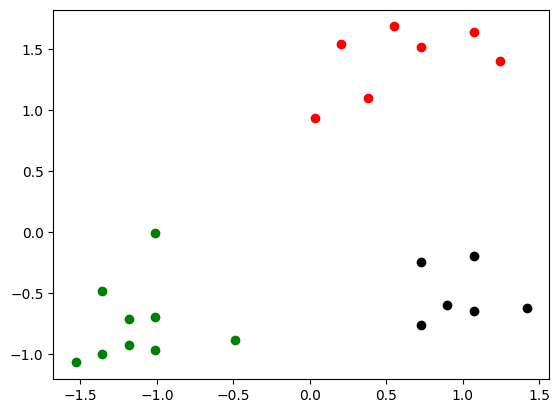

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['Age'],df1['Income($)'], color='green')
plt.scatter(df2['Age'],df2['Income($)'], color='red')
plt.scatter(df3['Age'],df3['Income($)'], color='black')
plt.show()


In [17]:
#Elbow method
wcss = []
k_rng = range(1,10)
for i in k_rng:
  km = KMeans(n_clusters=i)
  km.fit(df[['Age','Income($)']])
  wcss.append(km.inertia_)
print(wcss)

[43.99999999999999, 16.194890274706772, 3.8893086571301416, 3.34796907244354, 2.731250812977161, 1.8074518530059422, 1.8887509755927931, 1.2136565338891594, 1.0046643768248908]


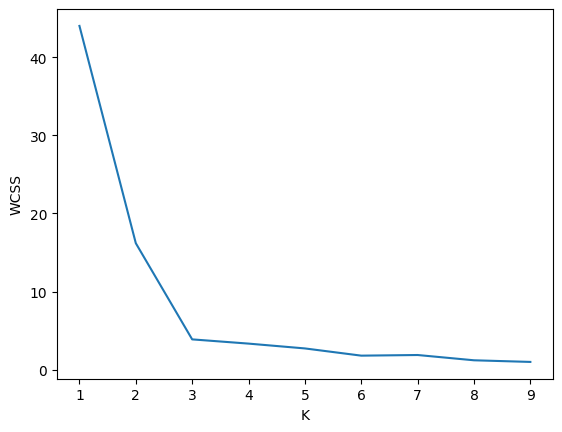

In [19]:
plt.plot(k_rng,wcss)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()